In [1]:
import pandas as pd

In [3]:
import prophet

In [4]:
df = pd.read_csv('../CLAAS_data/MLbase_DataFrame.csv')

In [17]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,AgriSpot,CBI,CBIPS,CBIPSFE,CornSpot,GER10Y,SoySpot,USTR10Y,WeizenSpot,WtiOilSpot
0,2013-04-01,B10,B10-0030,3,0.007692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-06-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-07-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-08-01,B10,B10-0030,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,2023-10-01,P02,P02-2078,0,0.000000,234.182,-31.9,-20.5,-43.2,217.797,2.911,260.098,4.687,198.708,88.82
18762,2023-11-01,P02,P02-2078,10,0.033333,234.431,-39.7,-35.9,-43.5,214.936,2.758,263.268,4.761,196.365,81.04
18763,2023-12-01,P02,P02-2078,1,0.003846,232.888,-47.5,-38.4,-56.6,215.360,2.363,266.732,4.220,199.354,73.72
18764,2024-01-01,P02,P02-2078,0,0.000000,228.351,-49.5,-40.2,-58.8,210.593,2.029,256.195,3.866,206.624,71.89


In [6]:
Merkmal = "B10"
Merkmalwert = "B10-0030"

In [8]:
filtered_df = df[(df['Merkmal'] == Merkmal) & (df['Merkmalwert'] == Merkmalwert)]

In [23]:
selected_columns = filtered_df[['Datum', 'Relativer Anteil']]
selected_columns

,Datum,Relativer Anteil
0,2013-04-01,0.007692
1,2013-05-01,0.000000
2,2013-06-01,0.000000
3,2013-07-01,0.000000
4,2013-08-01,0.000000
5,2013-09-01,0.000000
6,2013-10-01,0.006944
7,2013-11-01,0.000000
8,2013-12-01,0.034314
9,2014-01-01,0.000000


In [24]:
model = prophet.Prophet()
selected_columns = selected_columns.rename(columns={'Datum': 'ds', 'Relativer Anteil': 'y'})
model.fit(selected_columns)

14:07:57 - cmdstanpy - INFO - Chain [1] start processing
14:07:57 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\kraem\miniconda3\envs\python_da_tasks\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\kraem\miniconda3\envs\python_da_tasks\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


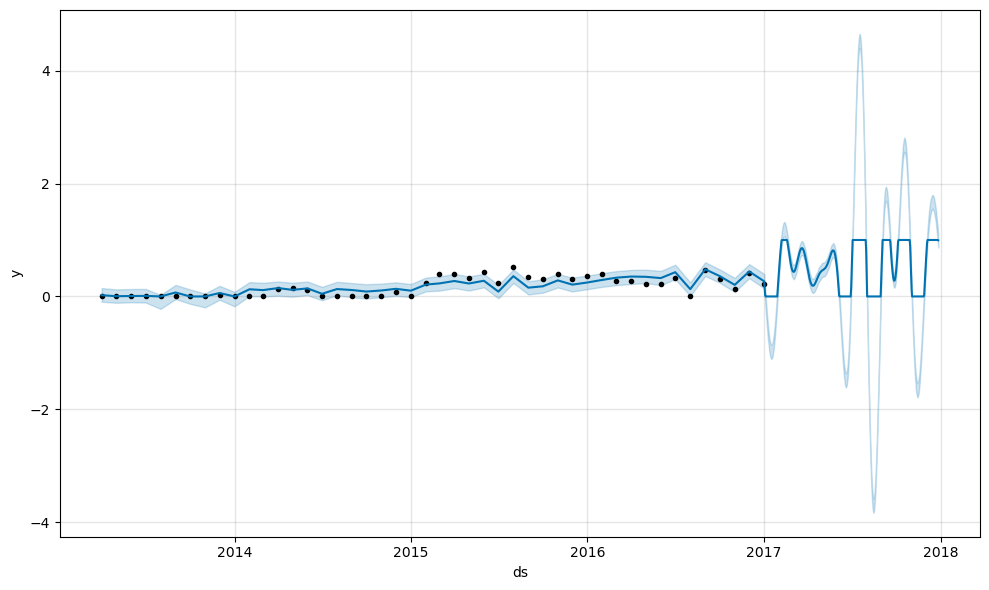

In [27]:
future = model.make_future_dataframe(periods=360)
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))
forecast['yhat'] = forecast['yhat'].apply(lambda x: min(x, 1))
fig = model.plot(forecast)